# Train a Semantic Segmentation Model for Water Detection

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/water_detection.ipynb)

This notebook demonstrates how to train semantic segmentation models for water detection.

## Install packages

To use the new functionality, ensure the required packages are installed.

## Import libraries

In [1]:
!pip install geoai

  Preparing metadata (setup.py) ... done
  Created wheel for geoai: filename=geoai-0.0.0.0-py3-none-any.whl size=1043 sha256=b64299cdc7c24431f9a9955bc743b01393643a07dd4916d4b6ba9d839b2a7b39
  Stored in directory: /root/.cache/pip/wheels/e6/d4/86/1a3e3fec278f85d65745903b5e8ca68498dbcce54968a99db3
Successfully built geoai


In [2]:
%pip install geoai-py
import geoai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.9/632.9 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

## Download sample data

We'll use the [waterbody dataset](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies) from Kaggle. You will need to create an account and download the dataset. I have already downloaded the dataset and saved a copy on Hugging Face. Let's download the dataset:

In [3]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [4]:
out_folder = geoai.download_file(url)

Extracted to: waterbody-dataset


## Train semantic segmentation model

Now we'll train a semantic segmentation model using the new `train_segmentation_model` function. This function supports various architectures from `segmentation-models-pytorch`:

- **Architectures**: `unet`, `unetplusplus` `deeplabv3`, `deeplabv3plus`, `fpn`, `pspnet`, `linknet`, `manet`
- **Encoders**: `resnet34`, `resnet50`, `efficientnet-b0`, `mobilenet_v2`, etc.

For more details, please refer to the [segmentation-models-pytorch documentation](https://smp.readthedocs.io/en/latest/models.html).

Let's train the module using U-Net with ResNet34 encoder:

In [5]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and water
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

Using device: cuda
Found 2841 image files and 2841 label files
Training on 2272 images, validating on 569 images
Checking image sizes for compatibility...
Setting target_size to (512, 512) to standardize image dimensions.
This will resize all images to 512x512 pixels.
To use a different size, set target_size parameter explicitly.
Testing data loader...
Data loader test passed.


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Starting training with unet + resnet34
Model parameters: 24,436,514
Epoch: 1, Batch: 1/284, Loss: 0.7145, Time: 5.87s
Epoch: 1, Batch: 11/284, Loss: 0.4557, Time: 5.86s
Epoch: 1, Batch: 21/284, Loss: 0.6258, Time: 5.87s
Epoch: 1, Batch: 31/284, Loss: 0.4174, Time: 5.91s
Epoch: 1, Batch: 41/284, Loss: 0.4804, Time: 5.91s
Epoch: 1, Batch: 51/284, Loss: 0.7058, Time: 5.99s
Epoch: 1, Batch: 61/284, Loss: 0.5426, Time: 6.01s
Epoch: 1, Batch: 71/284, Loss: 0.4147, Time: 5.97s
Epoch: 1, Batch: 81/284, Loss: 0.4112, Time: 6.01s
Epoch: 1, Batch: 91/284, Loss: 0.5092, Time: 6.02s
Epoch: 1, Batch: 101/284, Loss: 0.4195, Time: 6.05s
Epoch: 1, Batch: 111/284, Loss: 0.4914, Time: 6.07s
Epoch: 1, Batch: 121/284, Loss: 0.4825, Time: 6.08s
Epoch: 1, Batch: 131/284, Loss: 0.5639, Time: 6.12s
Epoch: 1, Batch: 141/284, Loss: 0.4189, Time: 6.16s
Epoch: 1, Batch: 151/284, Loss: 0.4681, Time: 6.20s
Epoch: 1, Batch: 161/284, Loss: 0.4603, Time: 6.23s
Epoch: 1, Batch: 171/284, Loss: 0.4763, Time: 6.23s
Epoch: 

## Evaluate the model

Let's examine the training curves and model performance:

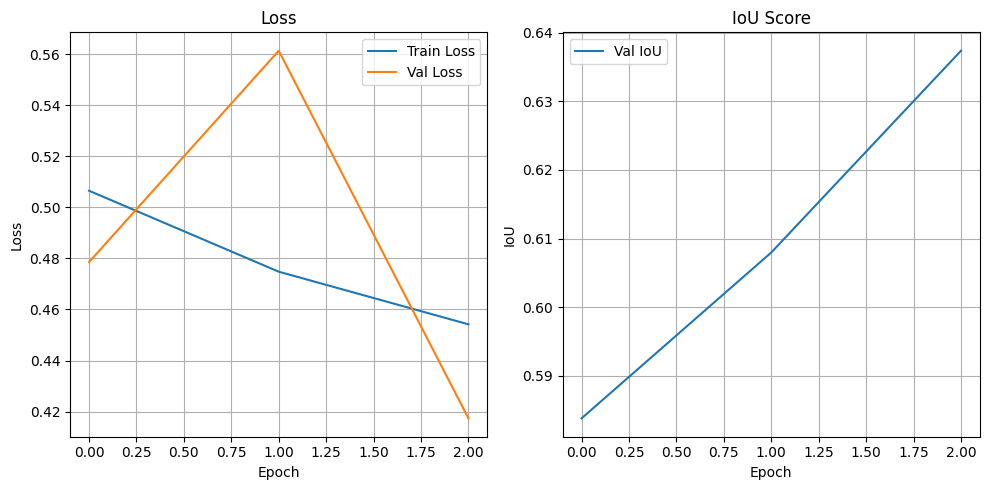

Best IoU: 0.6374
Final IoU: 0.6374


In [7]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

## Run inference

You can run inference on a new image using the `semantic_segmentation` function. I don't have a new image to test on, so I'll use one of the training images. In reality, you would use your own images not used in training.

In [8]:
index = 3
test_image_path = f"{out_folder}/images/water_body_{index}.jpg"
ground_truth_path = f"{out_folder}/masks/water_body_{index}.jpg"
prediction_path = f"{out_folder}/prediction/water_body_{index}.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [9]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.jpg)
Processing image: 658x659
Processing 4 windows...


9it [00:00, 31.63it/s]


Raw predicted classes and counts: {0: 350867, 1: 82755}
Binary predicted classes and counts: {0: 350867, 255: 82755}
Inference completed in 0.37 seconds
Saved binary prediction to waterbody-dataset/prediction/water_body_3.png (PNG format to preserve exact values)


## Visualize the results

Plot saved to: waterbody-dataset/prediction/water_body_3_comparison.png


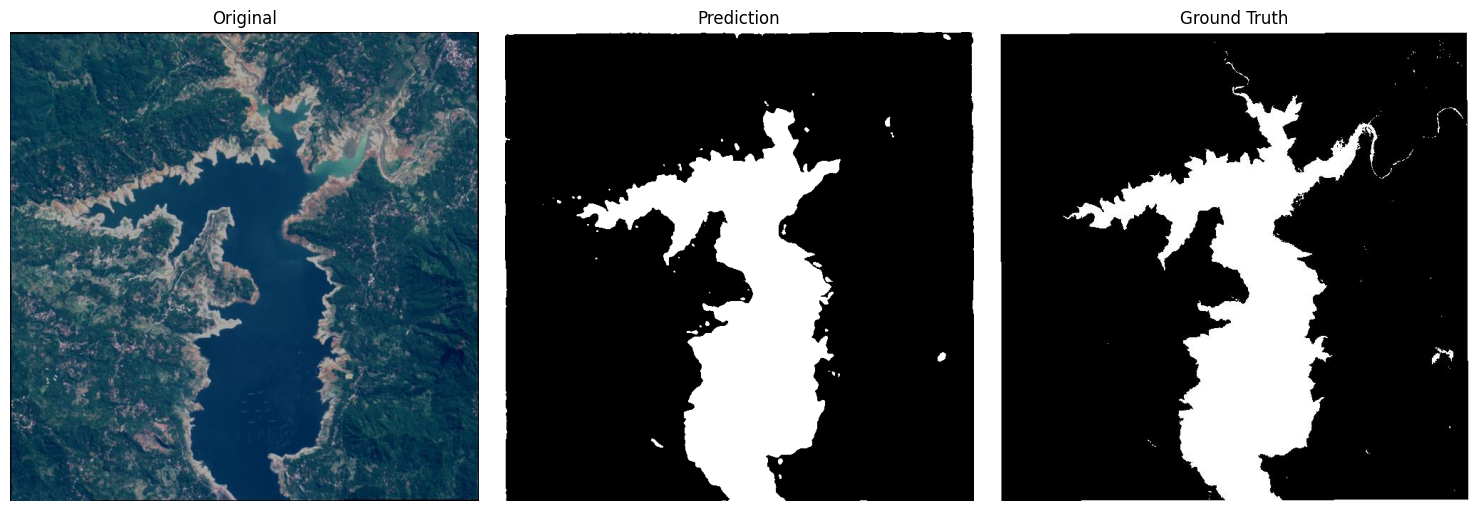

In [10]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_comparison.png",
    show_plot=True,
)

In [13]:
index = 3
test_image_path = '/content/waterbody-dataset/images/GE/powai_lake_mumbai.jpg'
ground_truth_path  = '/content/waterbody-dataset/images/GE/powai_lake_mumbai.jpg'
prediction_path = f"/content/waterbody-dataset/images/GE/powai_lake_mumbai_pred.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [12]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.jpg)
Processing image: 1485x892
Processing 15 windows...


24it [00:00, 38.56it/s]


Raw predicted classes and counts: {0: 1153353, 1: 171267}
Binary predicted classes and counts: {0: 1153353, 255: 171267}
Inference completed in 0.78 seconds
Saved binary prediction to /content/waterbody-dataset/images/GE/powai_lake_mumbai_pred.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/water_body_3_mumbai_comparison.png


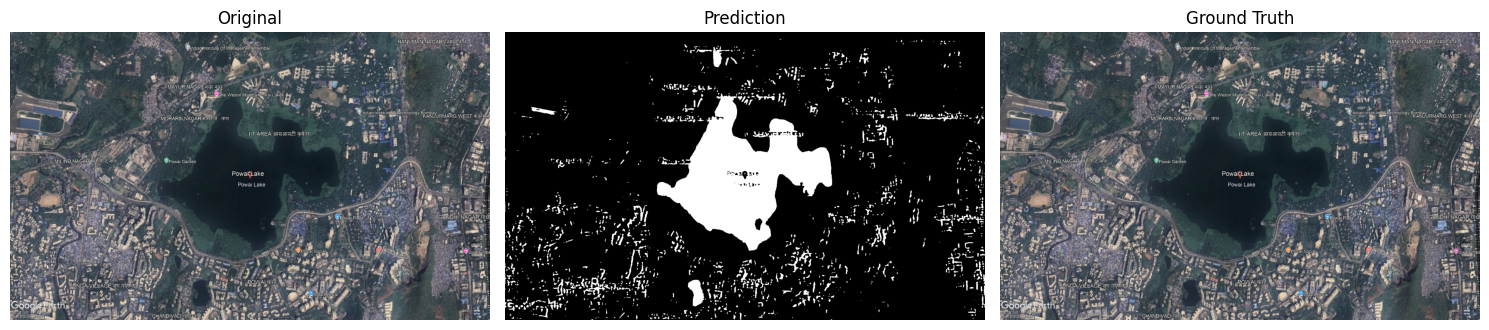

In [14]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_mumbai_comparison.png",
    show_plot=True,
)